In [1]:
import cv2
import numpy as np
import openvino as ov
import os

model_dir = 'models'
car_model_path = os.path.join(model_dir, 'vehicle-detection-0200.xml')  # Update with the actual car model file

# Check if the model file exists
if not os.path.exists(car_model_path):
    raise FileNotFoundError(f"Model file not found: {car_model_path}")
    
core = ov.Core()

model_car = core.read_model(model=car_model_path)
compiled_model_car = core.compile_model(model=model_car, device_name="CPU")

input_layer_car = compiled_model_car.input(0)
output_layer_car = compiled_model_car.output(0)

def preprocess(frame, input_layer):
    N, input_channels, input_height, input_width = input_layer.shape

    if frame is None:
        return None

    resized_frame = cv2.resize(frame, (input_width, input_height))
    transposed_frame = resized_frame.transpose(2, 0, 1)
    input_frame = np.expand_dims(transposed_frame, 0)

    return input_frame

def find_car_boxes(frame, results, confidence_threshold):
    results = results.squeeze()

    scores = results[:, 2]
    boxes = results[:, -4:]

    car_boxes = boxes[scores >= confidence_threshold]
    scores = scores[scores >= confidence_threshold]

    frame_h, frame_w, frame_channels = frame.shape

    car_boxes = car_boxes * np.array([frame_w, frame_h, frame_w, frame_h])
    car_boxes = car_boxes.astype(np.int64)

    return car_boxes, scores

def draw_car_boxes(car_boxes, frame):
    show_frame = frame.copy()

    for i in range(len(car_boxes)):
        xmin, ymin, xmax, ymax = car_boxes[i]
        car = frame[ymin:ymax, xmin:xmax]

        if car.size == 0:
            continue

        # --- Drawing ---
        fontScale = frame.shape[1] / 750
        text = f"Car"
        
        box_color = (0, 0, 255)  # Red color for cars
        cv2.putText(show_frame, text, (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, fontScale, (0, 0, 255), 2)
        cv2.rectangle(show_frame, (xmin, ymin), (xmax, ymax), box_color, 2)

    # Display the count of detected cars
    m = 1600 * len(car_boxes)
    
    if m >= 8000:
        traffic_text = 'Excessive load has been applied.'
    else:
        traffic_text = 'normal load'
        
    num_cars_text = f"Detected cars: {len(car_boxes)} {traffic_text} {m}kg"
    cv2.putText(show_frame, num_cars_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    return show_frame

def main():
    camera = cv2.VideoCapture(source)

    while True:
        ret, frame = camera.read()

        if not ret:
            print("Error: Could not read frame from camera")
            break

        input_frame = preprocess(frame, input_layer_car)
        if input_frame is None:
            continue
            
        results = compiled_model_car([input_frame])[output_layer_car]
        car_boxes, scores = find_car_boxes(frame, results, confidence_threshold)
        show_frame = draw_car_boxes(car_boxes, frame)

        show_frame_resized = cv2.resize(show_frame, (0, 0), fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
        cv2.imshow("Webcam", show_frame_resized)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    camera.release()
    cv2.destroyAllWindows()

confidence_threshold = 0.95
source = 'data/5927704-hd_1920_1080_30fps.mp4'  # Update with your video source

if __name__ == '__main__':
    main()

Error: Could not read frame from camera


Error: Could not read frame from camera


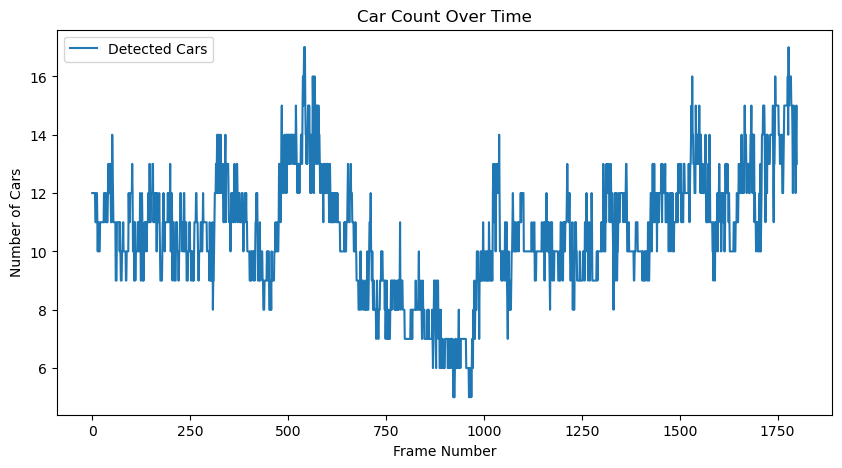

In [4]:
import cv2
import numpy as np
import openvino as ov
import os
from matplotlib import pyplot as plt

model_dir = 'models'
car_model_path = os.path.join(model_dir, 'vehicle-detection-0200.xml')  # Update with the actual car model file

# Check if the model file exists
if not os.path.exists(car_model_path):
    raise FileNotFoundError(f"Model file not found: {car_model_path}")
    
core = ov.Core()

model_car = core.read_model(model=car_model_path)
compiled_model_car = core.compile_model(model=model_car, device_name="CPU")

input_layer_car = compiled_model_car.input(0)
output_layer_car = compiled_model_car.output(0)

def preprocess(frame, input_layer):
    N, input_channels, input_height, input_width = input_layer.shape

    if frame is None:
        return None

    resized_frame = cv2.resize(frame, (input_width, input_height))
    transposed_frame = resized_frame.transpose(2, 0, 1)
    input_frame = np.expand_dims(transposed_frame, 0)

    return input_frame

def find_car_boxes(frame, results, confidence_threshold):
    results = results.squeeze()

    scores = results[:, 2]
    boxes = results[:, -4:]

    car_boxes = boxes[scores >= confidence_threshold]
    scores = scores[scores >= confidence_threshold]

    frame_h, frame_w, frame_channels = frame.shape

    car_boxes = car_boxes * np.array([frame_w, frame_h, frame_w, frame_h])
    car_boxes = car_boxes.astype(np.int64)

    return car_boxes, scores

def draw_car_boxes(car_boxes, frame):
    show_frame = frame.copy()

    for i in range(len(car_boxes)):
        xmin, ymin, xmax, ymax = car_boxes[i]
        car = frame[ymin:ymax, xmin:xmax]

        if car.size == 0:
            continue

        # --- Drawing ---
        fontScale = frame.shape[1] / 750
        text = f"Car"
        
        box_color = (0, 0, 255)  # Red color for cars
        cv2.putText(show_frame, text, (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, fontScale, (0, 0, 255), 2)
        cv2.rectangle(show_frame, (xmin, ymin), (xmax, ymax), box_color, 2)

    # Display the count of detected cars
    m = 1600 * len(car_boxes)
    
    if m >= 9000:
        traffic_text = 'Excessive load has been applied.'
    else:
        traffic_text = 'normal load'
        
    num_cars_text = f"Detected cars: {len(car_boxes)} {traffic_text} {m}kg"
    cv2.putText(show_frame, num_cars_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    return show_frame, len(car_boxes)

def main():
    camera = cv2.VideoCapture(source)

    car_counts = []
    frame_numbers = []

    frame_count = 0

    while True:
        ret, frame = camera.read()

        if not ret:
            print("Error: Could not read frame from camera")
            break

        input_frame = preprocess(frame, input_layer_car)
        if input_frame is None:
            continue
            
        results = compiled_model_car([input_frame])[output_layer_car]
        car_boxes, scores = find_car_boxes(frame, results, confidence_threshold)
        show_frame, car_count = draw_car_boxes(car_boxes, frame)

        car_counts.append(car_count)
        frame_numbers.append(frame_count)
        frame_count += 1

        show_frame_resized = cv2.resize(show_frame, (0, 0), fx=0.4, fy=0.4, interpolation=cv2.INTER_AREA)
        cv2.imshow("Webcam", show_frame_resized)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    camera.release()
    cv2.destroyAllWindows()

    # Plot the car count over time
    plt.figure(figsize=(10, 5))
    plt.plot(frame_numbers, car_counts, label='Detected Cars')
    plt.xlabel('Frame Number')
    plt.ylabel('Number of Cars')
    plt.title('Car Count Over Time')
    plt.legend()
    plt.show()

confidence_threshold = 0.95
source = 'test/v1.mp4'  # Update with your video source

if __name__ == '__main__':
    main()
